In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import rc, font_manager
ticks_font = font_manager.FontProperties(family='serif', style='normal',
                                         size=24, weight='normal', stretch='normal')

In [28]:


NbMo_concentration = np.array([5,8.5,19,25])/100
NbMo_Delta_E_p = np.array([48.8,56.2,74.5,84.7])
NbMo_a = np.array([3.289,3.282,3.261,3.250])
NbMo_E_k = np.array([0.6342,0.6302,0.6182,0.6112])
NbMo_E_v = np.array([2.989,2.987,2.984,2.983])
NbMo_E_si = np.array([5.361,5.437,5.664,5.784])

<Figure size 432x288 with 0 Axes>

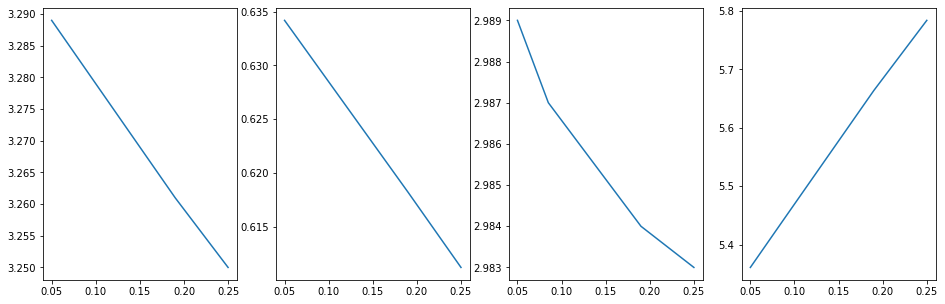

In [29]:
plt.draw()
f = plt.figure(figsize=(16,5))

(ax1,ax2,ax3,ax4) = f.subplots(1,4)

ax1.plot(NbMo_concentration, NbMo_a )
ax2.plot(NbMo_concentration, NbMo_E_k )
ax3.plot(NbMo_concentration, NbMo_E_v  )
ax4.plot(NbMo_concentration, NbMo_E_si  )


In [32]:
for quantity in [NbMo_a,NbMo_E_k,NbMo_E_v,NbMo_E_si]:
    fit = np.polyfit((NbMo_concentration),quantity,1)
    quantity_func = np.poly1d(fit)
    print(quantity_func(1))

3.1027942537131734
0.5250865351838322
2.960690041392745
7.379243486729964


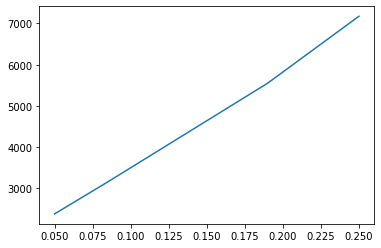

In [42]:
plt.plot((NbMo_concentration),(NbMo_Delta_E_p)**2)

In [33]:


NbW_concentration = np.array([5.6,6,15])/100
NbW_Delta_E_p = np.array([52.4,54.1,73.2])

NbW_a = np.array([3.290,3.289,3.275])
NbW_E_k = np.array([0.6548,0.6559,0.6798])
NbW_E_v = np.array([3.022,3.024,3.076])
NbW_E_si = np.array([5.494,5.511,5.897])

In [34]:
for quantity in [NbW_a,NbW_E_k,NbW_E_v,NbW_E_si]:
    fit = np.polyfit((NbW_concentration),quantity,1)
    quantity_func = np.poly1d(fit)
    print(quantity_func(1))

3.1409134025483674
0.9057086597451629
3.565575743275134
9.54178787163756


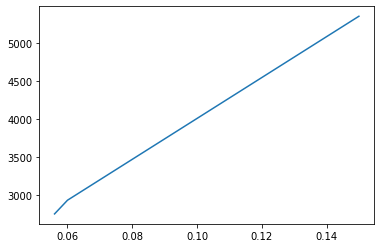

In [43]:


plt.plot((NbW_concentration),(NbW_Delta_E_p)**2)

In [49]:
NbW_Delta_E_p_fit = np.polyfit((NbW_concentration),(NbW_Delta_E_p)**2,1)
NbW_Delta_E_p_func = np.poly1d(NbW_Delta_E_p_fit)
np.sqrt(NbW_Delta_E_p_func(1))

169.35743784429866

In [50]:
NbMo_Delta_E_p_fit = np.polyfit((NbMo_concentration),(NbMo_Delta_E_p)**2,1)
NbMo_Delta_E_p_func = np.poly1d(NbMo_Delta_E_p_fit)
np.sqrt(NbMo_Delta_E_p_func(1))

157.8559574475416

In [55]:
Delta_E_p_i = np.array([34.3,157.9,169.3])
c1 = np.array([95,5,0])/100
c2 = np.array([91.5,8.5,0])/100
c3 = np.array([94,0,6])/100


In [56]:
np.dot(Delta_E_p_i **2,c2 )**(0.5)

56.53090482205287

In [62]:
a = np.array([1,2,3,4,5])
b = np.array([2,2,31,40,5])
c = np.array([13,21,3,4,7])
d = np.array([a,b,c])

In [76]:
tau_i_pst = d.transpose()
tau_i_pst

array([[ 1,  2, 13],
       [ 2,  2, 21],
       [ 3, 31,  3],
       [ 4, 40,  4],
       [ 5,  5,  7]])

In [79]:
[np.sum(i**2)**(0.5) for i in tau_i_pst]

[13.19090595827292,
 21.18962010041709,
 31.28897569432403,
 40.39801975344831,
 9.9498743710662]